In [1]:
import configobj
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
%matplotlib inline

In [2]:
config = configobj.ConfigObj('/Users/tminehardt/.authtoken_Quandl')
authtoken = config['authtoken']

In [37]:
CL_dict = {}
for i in range(1, 50):
    name = 'CL' + str(i)
    contract = 'CHRIS/CME_CL' + str(i)
    try:
        CL_dict[name] = quandl.get(contract, authtoken=authtoken)
    except:
        pass

In [38]:
for i in CL_dict.keys():
    CL_dict[i].to_csv(i +'.csv')

In [20]:
CLZ2014.to_csv('CLZ2014.csv')

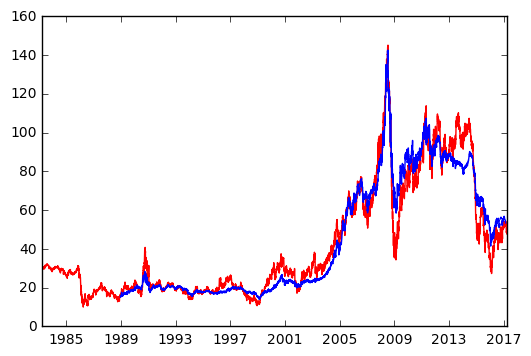

In [34]:
plt.plot(CL_dict['CL1'].Open, 'r')
plt.plot(CL_dict['CL36'].Open, 'b')

In [35]:
CL_Indiv_dict = {}
for i in range(1983, 2025):
    for j in ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z']:
        name = 'CL' + j + str(i)
        contract = 'CME/CL' + j + str(i)
        try:
            CL_Indiv_dict[name] = quandl.get(contract, authtoken=authtoken)
        except:
            pass

In [36]:
for i in CL_Indiv_dict.keys():
    CL_Indiv_dict[i].to_csv(i +'.csv')

In [4]:
VIX.columns = ['Open', 'High', 'Low', 'Close']  # Properly name the columns for this case.

In [5]:
len(SPY), len(VIX)  # Will need both arrays to be the same size.

(5891, 3138)

In [6]:
x = pd.merge(VIX, SPY, left_index=True, right_index=True, suffixes=('_VIX', '_SPY'))

In [7]:
predictor = x.Open_VIX - x.Close_VIX.shift(periods=1)  # Today's open - yesterday's close.

In [8]:
predictor.dropna(inplace=True)  # Drop NaNs from the shift operation. Will truncate array by 1 at start of array.

In [9]:
predictor = np.asarray(predictor)  # Make this a numpy array.

In [10]:
target = x.Close_SPY - x.Open_SPY  # Today's close - today's open.

In [11]:
target = np.asarray(target)[1:]  # Make this a numpy array, slice to match length of predictor (from start).

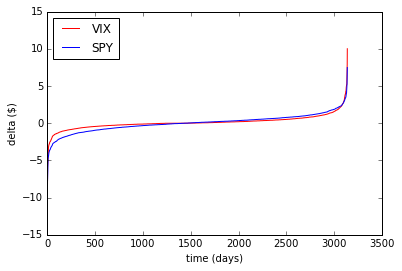

In [26]:
plt.plot(np.sort(predictor), 'r-', label='VIX')
plt.plot(np.sort(target), 'b-', label='SPY')
plt.ylabel('delta ($)')
plt.xlabel('time (days)')
plt.legend()
plt.rcParams['legend.loc'] = 'upper left'
plt.show()  # A quick look at the distributions.